# **Logistic Regression**

1. Data Exploration:

a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.

2. Data Preprocessing:

a. Handle missing values (e.g., imputation).

b. Encode categorical variables.

3. Model Building:

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.

4. Model Evaluation:

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

Visualize the ROC curve.

5. Interpretation:

a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).

**1) Data Exploration**

a) Load the dataset and perform exploratory data analysis (EDA).

In [ ]:
# Install the necessary libraries
# pip install pandas numpy matplotlib seaborn scikit-learn streamlit


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')

# Display the first few rows of the dataset
print(train_df.head())

# Summary statistics
print(train_df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

b) Examine the features, their types, and summary statistics.

In [ ]:
# Data types and non-null counts
print(train_df.info())

# Summary statistics
print(train_df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

c) Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

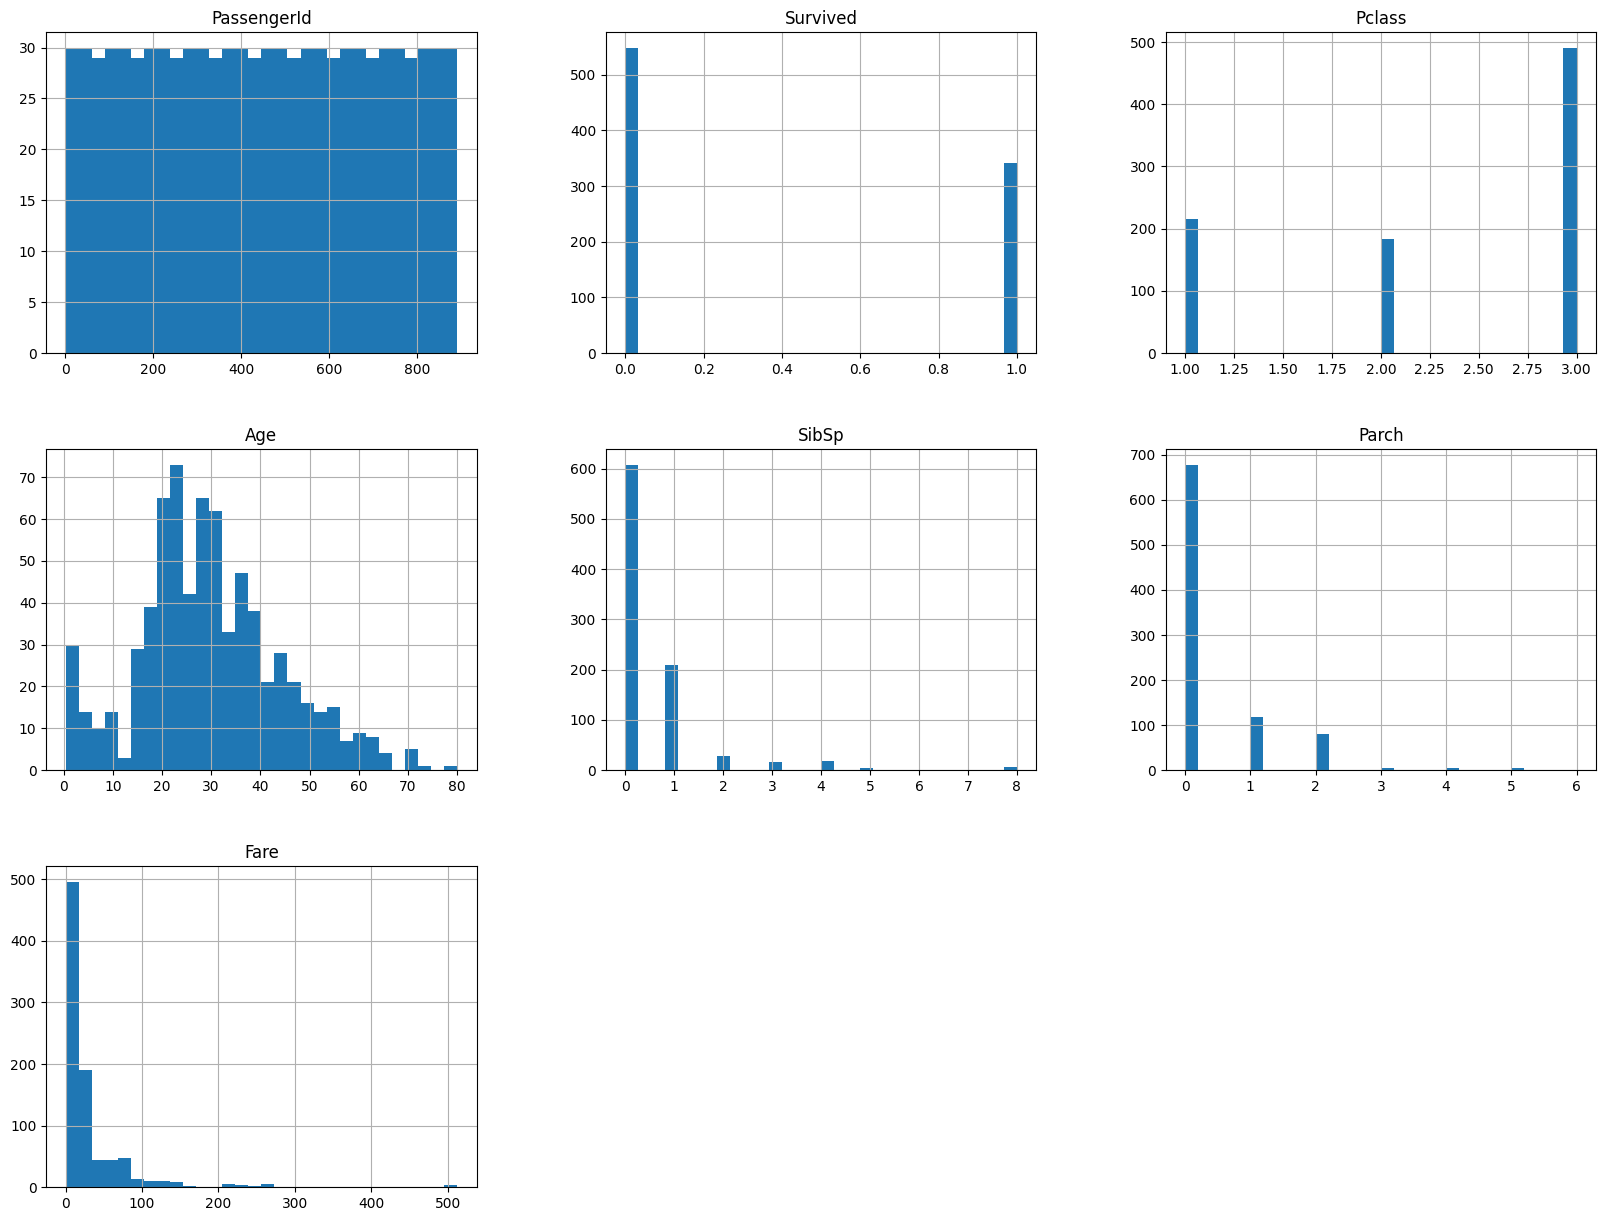

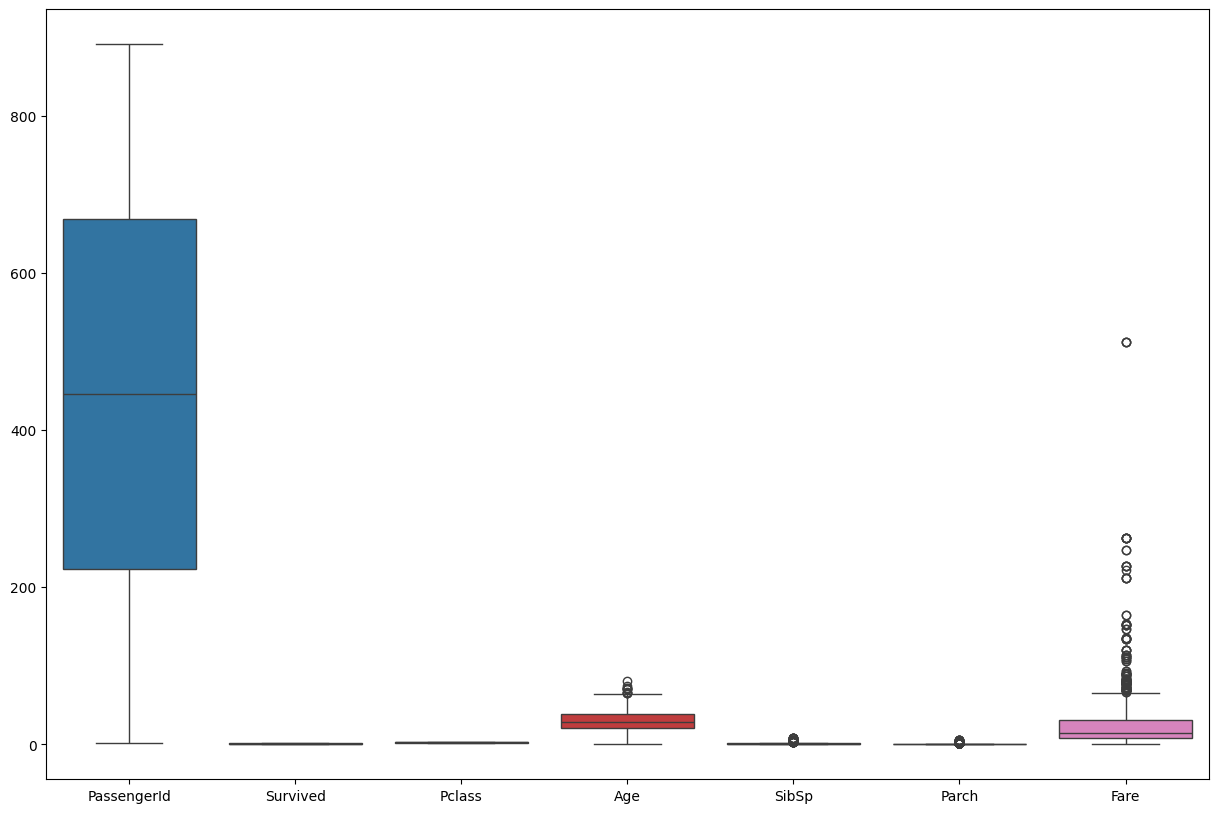

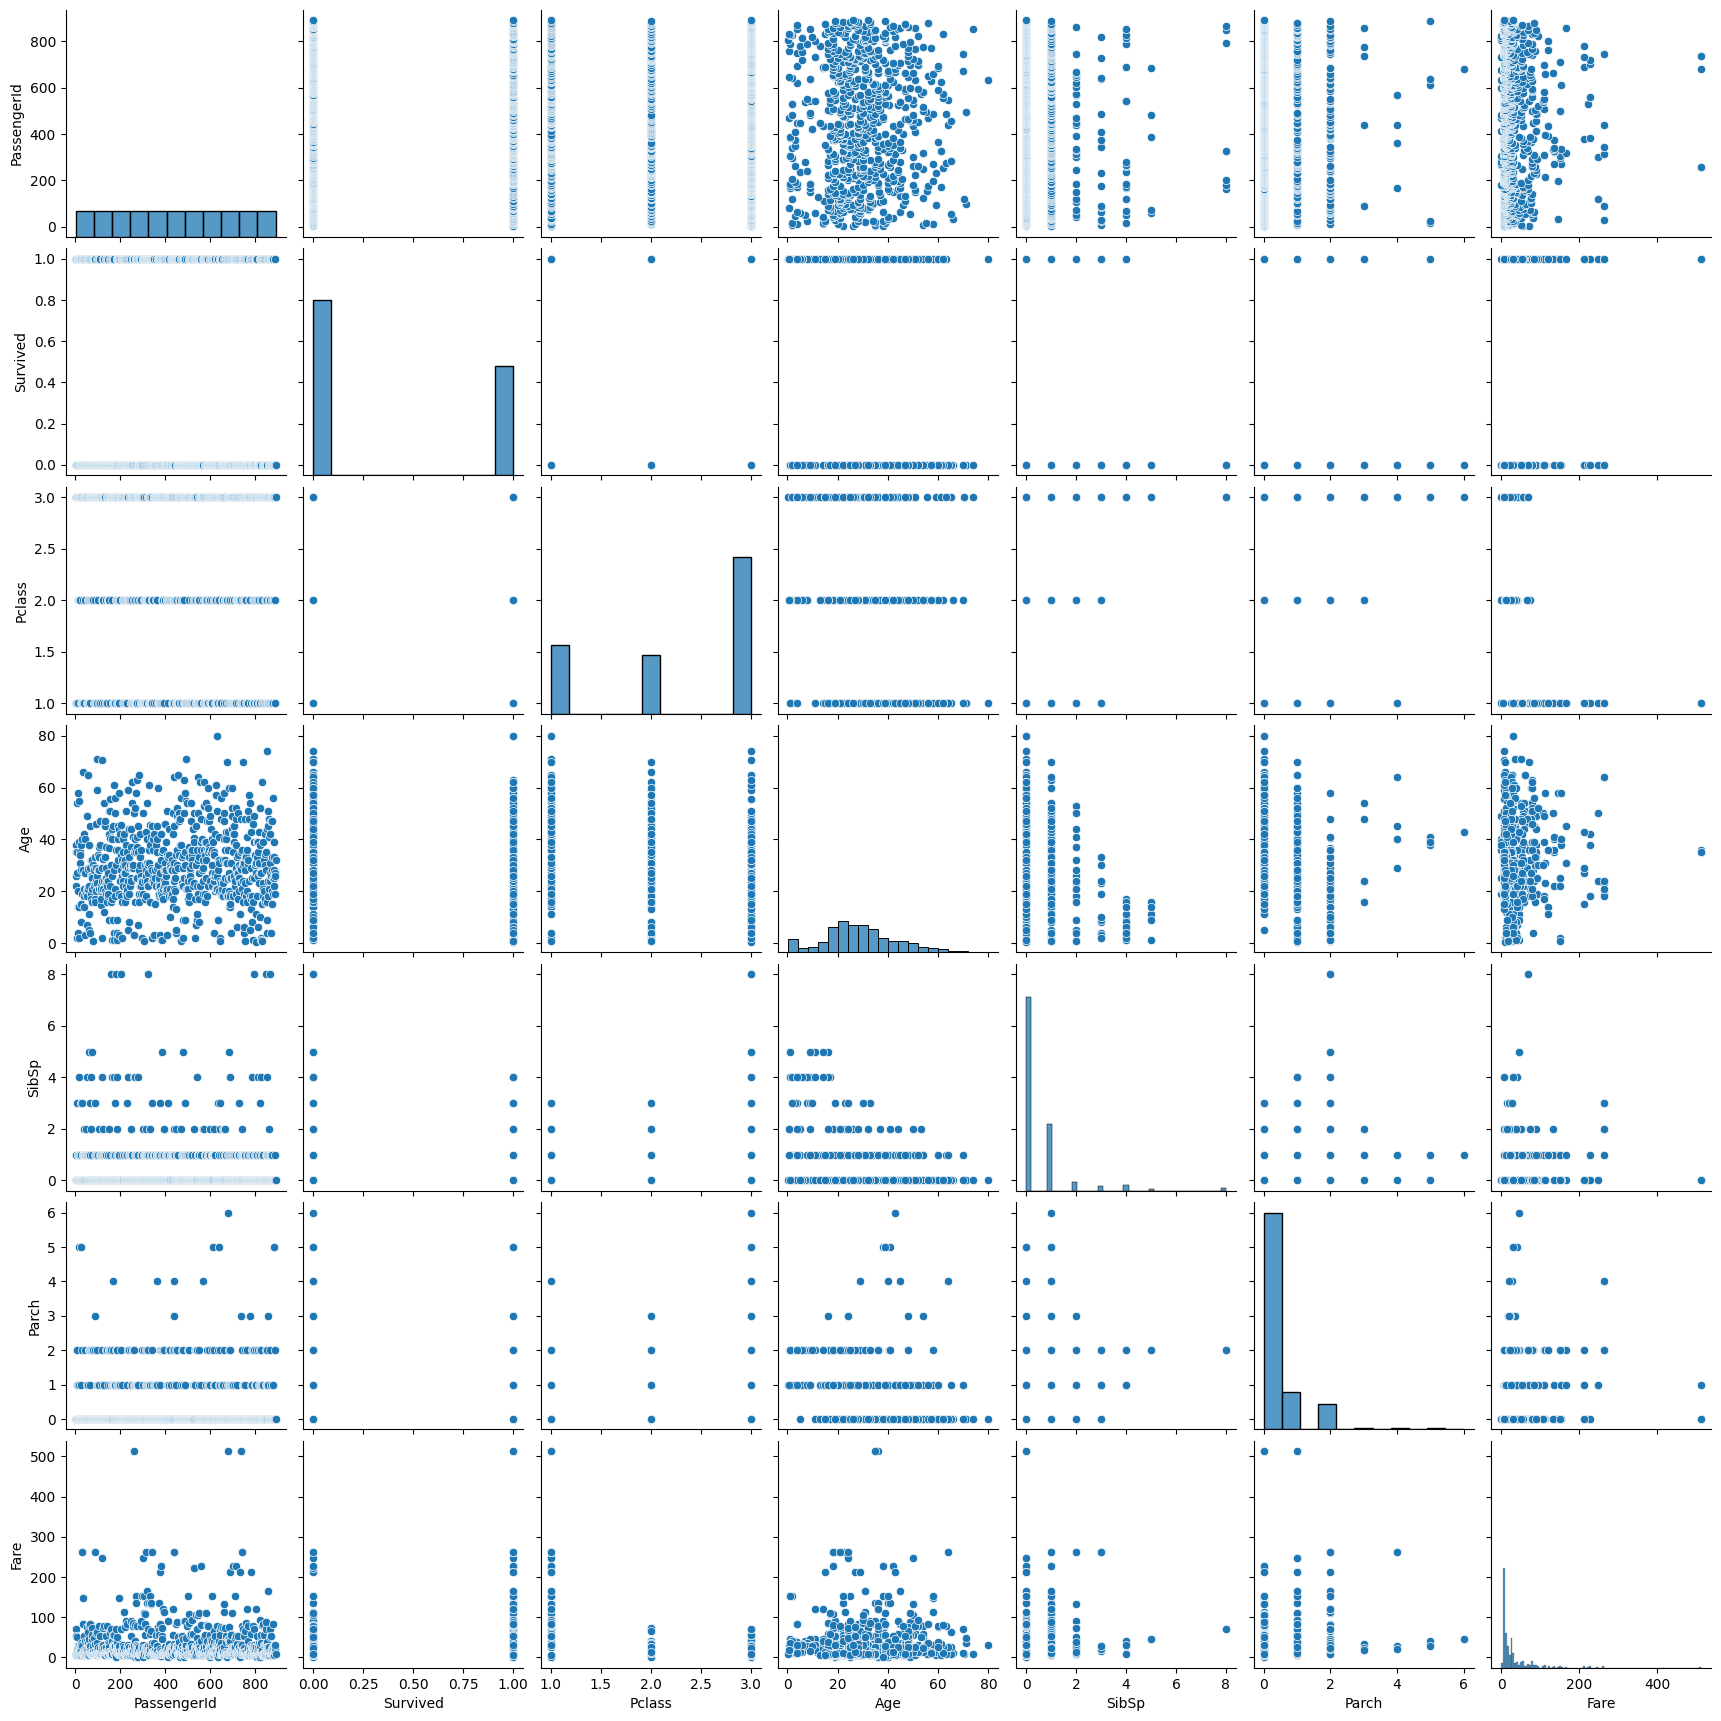

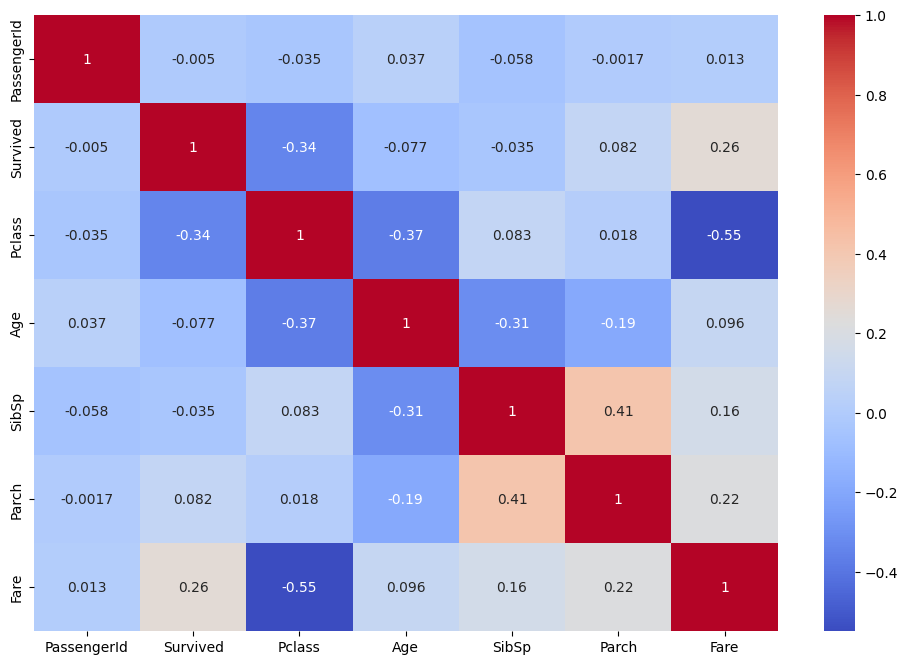

In [ ]:
# Histograms for numerical features
train_df.hist(bins=30, figsize=(20, 15))
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']))
plt.show()

# Pair plot for relationships
sns.pairplot(train_df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


**2) Data Preprocessing**

a) Handle missing values (e.g., imputation).

In [ ]:
# Check for missing values
print(train_df.isnull().sum())

# Handle missing values (example: fill with mean or mode)
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop columns with too many missing values
train_df.drop(columns=['Cabin'], inplace=True)

# Repeat similar steps for the test set
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


b) Encode categorical variables.

In [ ]:
# One-hot encoding for categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)


**3) Model Building**

a) Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b) Train the model using the training data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target variable
X = train_df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = train_df['Survived']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

**4) Model Evaluation**

a) Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-Score: 0.7638888888888888
ROC-AUC: 0.8818532818532818


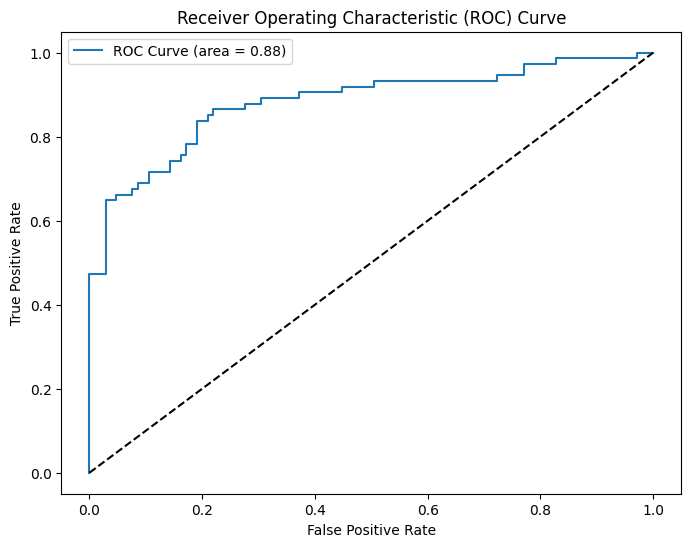

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predictions
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')


b) Visualize the ROC curve.

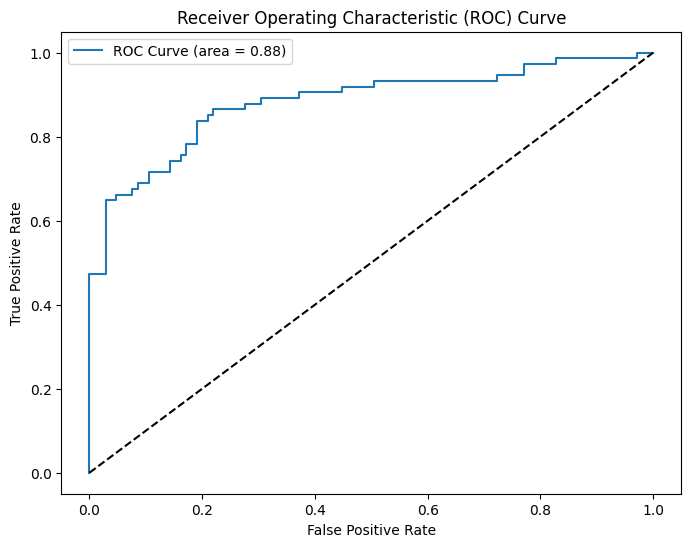

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

**5) Interpretation**

a) Interpret the coefficients of the logistic regression model.

In [ ]:
# Model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients)


      Feature  Coefficient
0      Pclass    -0.940914
1         Age    -0.031350
2       SibSp    -0.297134
3       Parch    -0.111243
4        Fare     0.002548
5    Sex_male    -2.590460
6  Embarked_Q    -0.092182
7  Embarked_S    -0.406148


b) Discuss the significance of features in predicting the target variable (survival probability in this case).

**Interpretation of Coefficients:**

1) Positive Coefficients:

Features with positive coefficients increase the probability of survival. For example, if the feature Sex_male has a negative coefficient, it implies that being male decreases the probability of survival compared to the baseline category (female in this case if Sex_female was dropped due to one-hot encoding).

2) Negative Coefficients:

Features with negative coefficients decrease the probability of survival. For example, if the feature Pclass has a negative coefficient, it implies that being in a higher class (which could be encoded as 1, 2, 3) decreases the probability of survival compared to the baseline.

3) Magnitude of Coefficients:

The magnitude of the coefficients indicates the strength of the relationship. Larger absolute values suggest a stronger influence on the target variable.

4) Feature Significance:

To determine which features are statistically significant, we could look at p-values associated with each coefficient. However, scikit-learn does not provide p-values directly, so we would need to use a library like statsmodels for that purpose.

**Magnitude of Coefficients:**

-> Pclass: A negative coefficient (-0.940914) suggests that as the class number increases (which could mean a lower class), the probability of survival decreases.

-> Sex_male: A negative coefficient (-2.5904605) indicates that males have a lower probability of survival compared to females.

-> Age: A small negative coefficient (-0.031350) suggests that as age increases, the probability of survival slightly decreases.

-> Fare: A positive coefficient (0.002548) suggests that higher fares are associated with a higher probability of survival, although the effect is very small.

-> Embarked_Q and Embarked_S: Negative coefficients (-0.092182 and -0.406148) suggest that passengers embarking from these locations have a lower probability of survival compared to the baseline (Embarked_C).

**Conclusion:**
By analyzing the coefficients, we can gain insights into which factors are most influential in determining survival probability. This information can help in making informed decisions and further improving the model by focusing on the most significant features. For instance, knowing that Pclass and Sex are significant predictors can help prioritize these variables in future analyses or model improvements.

6) Deployment with Streamlit:

In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

a) Create Streamlit App

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn streamlit


In [ ]:
pip install streamlit


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load trained model
with open('/content/logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Streamlit app
st.title('Titanic Survival Prediction')

# User inputs
age = st.number_input('Age', min_value=0, max_value=100, value=30)
fare = st.number_input('Fare', min_value=0.0, max_value=600.0, value=32.0)
pclass = st.selectbox('Passenger Class', options=[1, 2, 3], index=1)
sex = st.selectbox('Sex', options=['Male', 'Female'])
sibsp = st.number_input('Siblings/Spouses Aboard', min_value=0, max_value=10, value=0)
parch = st.number_input('Parents/Children Aboard', min_value=0, max_value=10, value=0)
embarked = st.selectbox('Embarked', options=['C', 'Q', 'S'])

# Preprocess user input
sex_male = 1 if sex == 'Male' else 0
embarked_Q = 1 if embarked == 'Q' else 0
embarked_S = 1 if embarked == 'S' else 0

# Predict
input_data = np.array([pclass, age, sibsp, parch, fare, sex_male, embarked_Q, embarked_S]).reshape(1, -1)
prediction = model.predict(input_data)[0]
prediction_proba = model.predict_proba(input_data)[0][1]

# Display prediction
st.subheader('Prediction')
st.write('Survived' if prediction == 1 else 'Did not survive')
st.subheader('Prediction Probability')
st.write(f'Survival Probability: {prediction_proba:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


b) Save the Model

In [ ]:
 import pickle

# Save the trained model to a file
with open('/content/logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


c) Run the Streamlit App
Run the following command in your terminal:

streamlit run app.py
